In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape

(1348, 62, 47)

In [4]:
imshape = faces.images[0].shape
imshape

(62, 47)

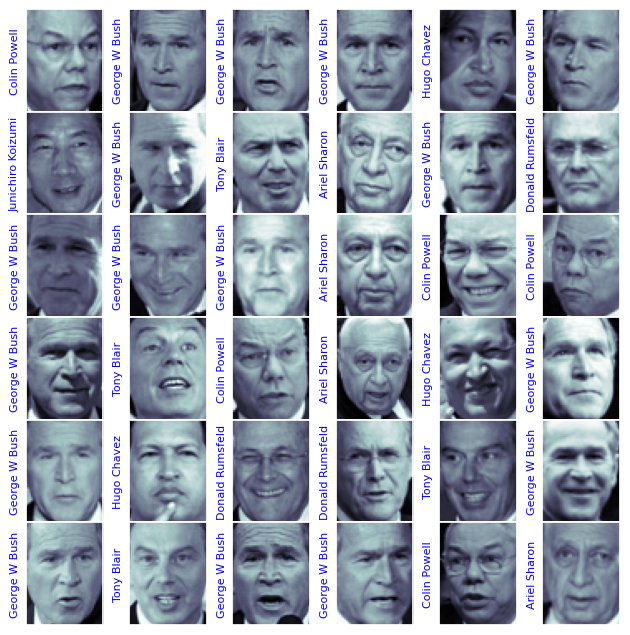

In [5]:
fig,ax = plt.subplots(6,6, figsize=(8,8),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0, wspace=0))
for i,axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set_ylabel(faces.target_names[faces.target[i]], fontsize=8,
                 color='blue')

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = \
  train_test_split(faces.data, faces.target, train_size=0.6, random_state=0)

In [7]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [8]:
pca = PCA(n_components=150, whiten=True, random_state=0)
svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)

model = make_pipeline(pca, svc)

In [9]:
from sklearn.model_selection import GridSearchCV
grid_params={
    'svc__C':np.array([1,5,10,50]),
    'svc__gamma':np.array([0.0001, 0.0005, 0.001, 0.005])
}

grid  = GridSearchCV(model, grid_params, cv=7)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=0))]),
             param_grid={'svc__C': array([ 1,  5, 10, 50]),
                         'svc__gamma': array([0.0001, 0.0005, 0.001 , 0.005 ])})

In [10]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.005}

In [11]:
model = grid.best_estimator_
model.fit(Xtrain, ytrain)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=0, whiten=True)),
                ('svc',
                 SVC(C=5, class_weight='balanced', gamma=0.005,
                     random_state=0))])

In [12]:
ypred = model.predict(Xtest)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.95      0.70      0.81        27
     Colin Powell       0.78      0.86      0.82        94
  Donald Rumsfeld       0.81      0.67      0.73        51
    George W Bush       0.79      0.96      0.86       214
Gerhard Schroeder       0.88      0.65      0.75        43
      Hugo Chavez       1.00      0.50      0.67        32
Junichiro Koizumi       1.00      0.68      0.81        25
       Tony Blair       0.83      0.74      0.78        54

         accuracy                           0.81       540
        macro avg       0.88      0.72      0.78       540
     weighted avg       0.83      0.81      0.81       540



In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.8148148148148148

Text(109.44999999999996, 0.5, 'predicted labels')

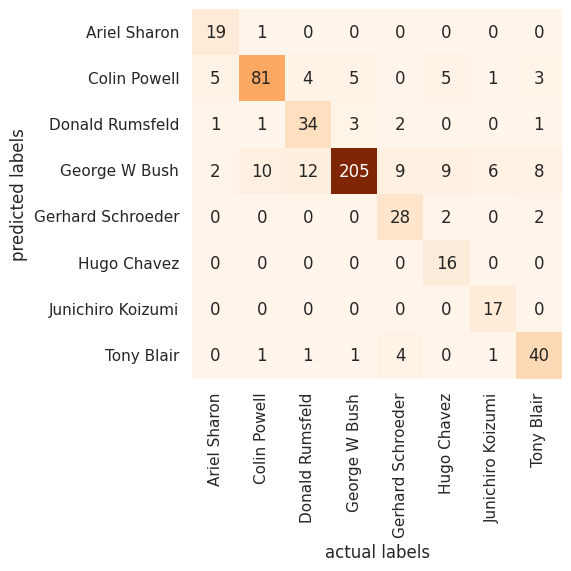

In [15]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, fmt='d',
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap='Oranges')
plt.xlabel('actual labels')
plt.ylabel('predicted labels')

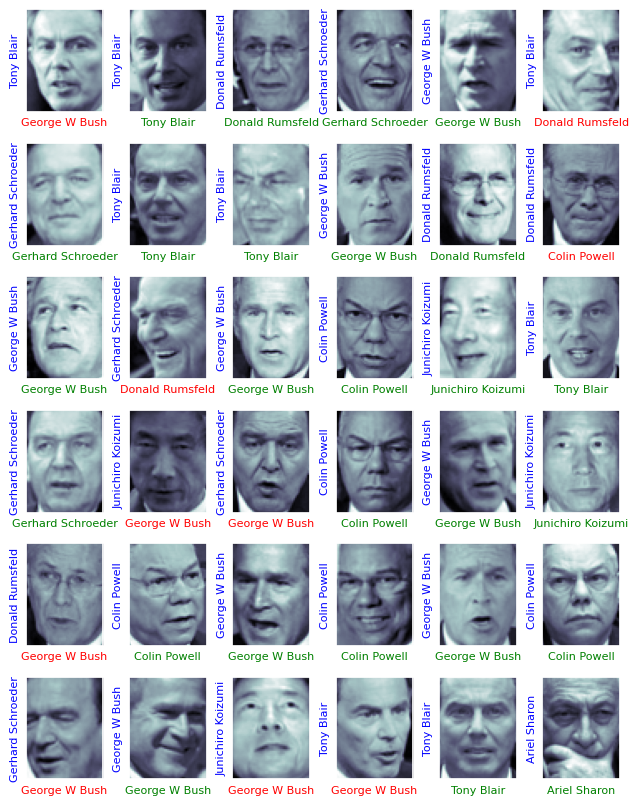

In [16]:
fig,ax = plt.subplots(6,6, figsize=(8,10),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.3, wspace=0))
for i,axi in enumerate(ax.flat):
  axi.imshow(Xtest[i].reshape(imshape), cmap='bone')
  axi.set_ylabel(faces.target_names[ytest[i]], fontsize=8,
                 color='blue')
  axi.set_xlabel(faces.target_names[ypred[i]], fontsize=8,
                 color='green' if ypred[i]==ytest[i] else 'red')

